# Real Time Face Mask Detection using Python and TensorFlow

## Background

Face masks have become a part of our daily routine as the COVID-19 pandemic took the world by storm. Wearing them helps protect ourselves and others from the virus, which is why many governments have made it mandatory to wear masks in public spaces. Although these rules are crucial for our safety, it's not always easy for authorities to ensure that everyone is following them. This is where a real-time face mask detection model can be a game-changer.

By using artificial intelligence and computer vision, the detection model can quickly spot whether people are wearing masks properly or not. This not only eases the burden on authorities but also adds an extra layer of protection for everyone's health. For example, you're about to enter a busy train station, and the security system at the entrance scans everyone's faces. If someone isn't wearing a mask, they won't be allowed in, making it safer for everyone inside. With a real-time face mask detection model in place, we can all breathe a little easier, knowing that this smart technology is working to keep us safe.

## Objective

The objective for this project is to develop and implement a reliable and efficient real-time face mask detection system that can accurately identify individuals wearing masks in various settings. This system would enhance compliance with mask mandates, improve public safety, and ultimately contribute to the reduction of COVID-19 transmission in our communities.

## Dataset

[Dataset](https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset)

We will be using the kaggle dataset above, where there are 12000 images of people that are either maskless or wearing masks.

The data is split between training, testing, and validation sets, and the data consists of 2 different labels (WithMask, WithoutMask).

Using this dataset, we will be able to train a face mask recognition model to be able to check if someone is wearing a facemask or not in real-time.

## Import Library

Import all the library that we will be using.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.python.client import device_lib
import tensorflow as tf
from PIL import Image

Checking to see if our tensorflow is using a gpu or not.

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
device_lib.list_local_devices()

Num GPUs Available:  1


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 615216297902849216,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5736759296
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5376740808210829371
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"]

## Data Loading

We will load the data using the Path and os module to read our images based on the directory we use to store the images and read our images with png extension (all image data in this case uses .png), and labels based on the folder name in the filepath. Then we will create a dataframe with the image filepath with the column name "Images" and another column with its label.

In [3]:
direc = Path('C:/Users/Administrator/Documents/FM Det/Face Mask Dataset/Train')
filepaths = list(direc.glob(r'**/*.png'))
Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths))


filepaths = pd.Series(filepaths, name='Images').astype(str) 
Labels = pd.Series(Labels, name='Labels').astype(str)


train_df = pd.merge(filepaths, Labels, right_index = True, left_index = True)
 
#Resampling it
train_df=train_df.sample(frac = 1).reset_index(drop=True)
train_df.head(10)

,Images,Labels
0,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask
1,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask
2,C:\Users\Administrator\Documents\FM Det\Face M...,WithoutMask
3,C:\Users\Administrator\Documents\FM Det\Face M...,WithoutMask
4,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask
5,C:\Users\Administrator\Documents\FM Det\Face M...,WithoutMask
6,C:\Users\Administrator\Documents\FM Det\Face M...,WithoutMask
7,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask
8,C:\Users\Administrator\Documents\FM Det\Face M...,WithoutMask
9,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask


In [4]:
direc = Path('C:/Users/Administrator/Documents/FM Det/Face Mask Dataset/Test')
filepaths = list(direc.glob(r'**/*.png'))
Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths))


filepaths = pd.Series(filepaths, name='Images').astype(str) 
Labels = pd.Series(Labels, name='Labels').astype(str)


test_df = pd.merge(filepaths, Labels, right_index = True, left_index = True)
 
#Resampling it
test_df=test_df.sample(frac = 1).reset_index(drop=True)
test_df.head(10)

,Images,Labels
0,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask
1,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask
2,C:\Users\Administrator\Documents\FM Det\Face M...,WithoutMask
3,C:\Users\Administrator\Documents\FM Det\Face M...,WithoutMask
4,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask
5,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask
6,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask
7,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask
8,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask
9,C:\Users\Administrator\Documents\FM Det\Face M...,WithoutMask


In [5]:
direc = Path('C:/Users/Administrator/Documents/FM Det/Face Mask Dataset/Validation')
filepaths = list(direc.glob(r'**/*.png'))
Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths))


filepaths = pd.Series(filepaths, name='Images').astype(str) 
Labels = pd.Series(Labels, name='Labels').astype(str)


val_df = pd.merge(filepaths, Labels, right_index = True, left_index = True)
 
#Resampling it
val_df=val_df.sample(frac = 1).reset_index(drop=True)
val_df.head(10)

,Images,Labels
0,C:\Users\Administrator\Documents\FM Det\Face M...,WithoutMask
1,C:\Users\Administrator\Documents\FM Det\Face M...,WithoutMask
2,C:\Users\Administrator\Documents\FM Det\Face M...,WithoutMask
3,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask
4,C:\Users\Administrator\Documents\FM Det\Face M...,WithoutMask
5,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask
6,C:\Users\Administrator\Documents\FM Det\Face M...,WithoutMask
7,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask
8,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask
9,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask


In [6]:
train_df

,Images,Labels
0,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask
1,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask
2,C:\Users\Administrator\Documents\FM Det\Face M...,WithoutMask
3,C:\Users\Administrator\Documents\FM Det\Face M...,WithoutMask
4,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask
...,...,...
9995,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask
9996,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask
9997,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask
9998,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask


In [7]:
test_df

,Images,Labels
0,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask
1,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask
2,C:\Users\Administrator\Documents\FM Det\Face M...,WithoutMask
3,C:\Users\Administrator\Documents\FM Det\Face M...,WithoutMask
4,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask
...,...,...
987,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask
988,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask
989,C:\Users\Administrator\Documents\FM Det\Face M...,WithMask
990,C:\Users\Administrator\Documents\FM Det\Face M...,WithoutMask


## Exploratory Data Analysis

Check our data using df.info()

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Images  10000 non-null  object
 1   Labels  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Images  992 non-null    object
 1   Labels  992 non-null    object
dtypes: object(2)
memory usage: 15.6+ KB


In [10]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Images  800 non-null    object
 1   Labels  800 non-null    object
dtypes: object(2)
memory usage: 12.6+ KB


Afterwards, let's see five different image from the train dataset for each class.

In [11]:
class1_data = train_df[train_df["Labels"] == "WithMask"]
class2_data = train_df[train_df["Labels"] == "WithoutMask"]

In [12]:
class1_samples = class1_data.sample(5)
class2_samples = class2_data.sample(5)

In [13]:
def plot_images(samples, title):
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    fig.suptitle(title)

    for idx, ax in enumerate(axes):
        img_path = samples.iloc[idx]["Images"]
        img_label = samples.iloc[idx]["Labels"]
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(img_label)
        ax.axis("off")

    plt.show()

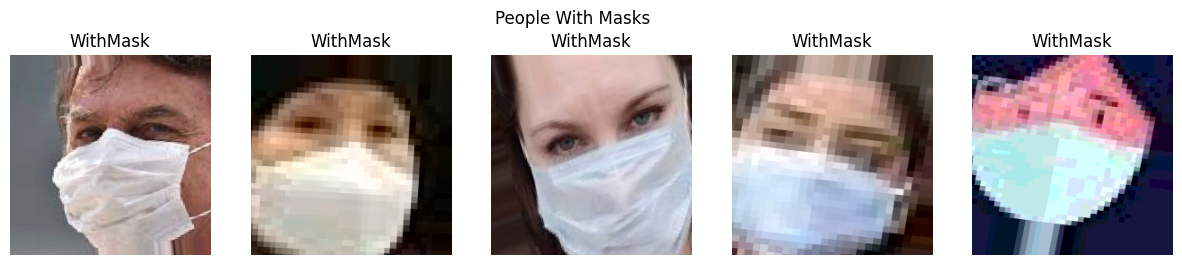

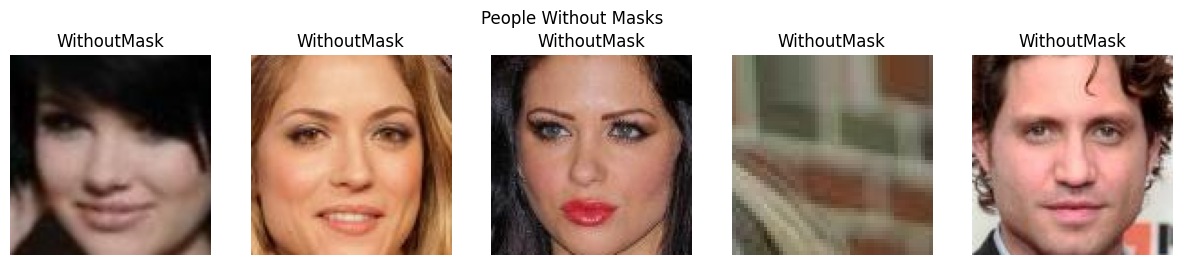

In [14]:
plot_images(class1_samples, "People With Masks")
plot_images(class2_samples, "People Without Masks")

In [16]:
train_df.Labels.value_counts()

WithMask       5000
WithoutMask    5000
Name: Labels, dtype: int64

In [17]:
test_df.Labels.value_counts()

WithoutMask    509
WithMask       483
Name: Labels, dtype: int64

## Feature Engineering

We will set a batch size of 128 by resizing our training data image to (224,224) pixels. This is done to speed up the training data without sacrificing the accuracy and performance of the model.

In [11]:
batch_size = 128
target_size = (224,224)

Next, we will preprocess the train and test datasets using ImageDataRegenerator. For the train dataset, we will also perform data augmentation so that the model can predict and generalize the new data to be predicted accurately. The augmentation and preprocessing done on the train set are:
- rotation_range = 20: Randomly rotates the image by a maximum of 20 degrees. This helps to increase the model's robustness to variations in image orientation.

- width_shift_range = 0.2 and height_shift_range = 0.2: Randomly shifts the image horizontally and vertically up to 20% of the image width and height. This helps to simulate variations in camera positioning and framing.

- shear_range = 0.2: Applies a random shear transformation to the image up to 20 degrees. This helps simulate distortions in the shape of objects in the image.

- zoom_range=0.2: Randomly zooms the image in or out by up to 20%. This helps to simulate variations in the camera's distance from objects in the image.

- horizontal_flip=True and vertical_flip=True: Randomly flip the image horizontally and vertically, respectively. This helps simulate variations in the orientation of objects in the image.

- fill_mode='nearest': Fills the newly created pixels during the data augmentation process with the nearest pixel value from the original image.

- preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input: Applies the preprocessing function of the MobileNet_v2 model to each image before it is input into the model. This function aims to normalize the pixel values of the image to be in the range of -1 to 1, which is the range expected by the MobileNet_v2 model.

- validation_split = 0.2: Set aside 20% of the training images for validation during training.

As for the test set, we will only do preprocessing with tf.keras.applications.mobilenet_v2.preprocess_input to normalize the pixel values in the image to be predicted. 

Thus, with the augmentation that has been done above on the training set, our model can predict and generalize better for various types of images even though the shape of the training image is different from the image to be predicted. While the preprocessing performed by tf.keras.applications.mobilenet_v2.preprocess_input on the train and test sets aims to make the model faster to reach convergence and also to make the model more stable in its calculations.

In [12]:
train_datagen = ImageDataGenerator(rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,validation_split=0.2)

test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

Next, we will use .flow_from_dataframe() to apply augmentation and preprocessing to our test data. .flow_from_dataframe() is a method in the Keras ImageDataGenerator class that generates a set of augmented/normalized data from a dataframe containing paths to image files and corresponding labels.

It takes a Pandas dataframe as input that includes the path to each image file and the corresponding class/label. This method reads the image from the path of the image file, applies various data augmentations (such as rotation, zooming, horizontal/vertical flipping previously done in ImageDataGenerator) and resizes it to a certain size. It then normalizes the pixel values in the image by dividing each pixel value.

Finally, this function will return a Python generator that produces a dataset of images and labels, which can be used to train deep learning models in Keras. The flow_from_dataframe() method allows easy handling of large datasets without loading all images into memory at once.

In [25]:
train_gen = train_datagen.flow_from_dataframe(train_df,
                                              x_col = 'Images', y_col ='Labels',
                                              target_size = target_size,
                                              color_mode='rgb',batch_size = batch_size, 
                                              class_mode = 'binary', shuffle = True, seed=42,
                                              subset='training')
val_gen = test_datagen.flow_from_dataframe(val_df, 
                                            target_size=target_size, x_col = 'Images', y_col ='Labels',color_mode='rgb', 
                                            class_mode='binary',
                                            batch_size= batch_size, shuffle=True,seed=42)
test_gen = test_datagen.flow_from_dataframe(test_df,
                                            target_size = target_size, x_col = 'Images', y_col ='Labels',
                                             class_mode = 'binary',color_mode='rgb',
                                            batch_size = batch_size, shuffle = False)

Found 8000 validated image filenames belonging to 2 classes.
Found 800 validated image filenames belonging to 2 classes.
Found 992 validated image filenames belonging to 2 classes.


In [15]:
train_gen.class_indices

{'WithMask': 0, 'WithoutMask': 1}

## Model Definition

For this case, we will be using a transfer learning model from ResNet 152 V2 to help improve our performance and generalization to predict new images.

In [105]:
base_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3),pooling='max')
base_model.trainable = False

234561536/234545216 [==============================] - 29s 0us/step


This code initializes the pre-trained ResNet 152 V2 model from Keras Applications.

- input_shape = (224, 224, 3) specifies the input shape of the model, which is an image with 224x24 pixels and 3 color channels (RGB).
- include_top = False specifies that we do not want to include the top layer of the trained model, which is used for classification. We will add our own classification layer later.
- weights='imagenet' specifies that we want to load the pre-trained model weights that have been trained on the ImageNet dataset.
- pooling='max' specifies that we want to use max pooling in the last layer of the model to reduce the spatial dimension of the output feature map to a fixed length vector.
- mnv2_model.trainable = False, freezes all layers in the pre-trained model so that their weights will not be updated during training of the new model that will be built on top of the pre-trained model.

In [106]:
# Define the model architecture
model = tf.keras.models.Sequential([
    # Convolutional layers
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

The model is a convolutional neural network (CNN) that uses transfer learning by fine-tuning the ResNet152V2 model pre-trained on the ImageNet dataset.

The following is a detailed description of each layer:

- base_model - This is the ResNet152V2 model pre-trained from the tf.keras.applications module. It uses the input shape (224, 224, 3) and covers all layers up to the max pooling layer.

- Flatten - this layer flattens the output of the MobileNetV2 layer, which is a 3D tensor, into a 1D tensor.

- Dense(256, activation='relu') - This is a fully connected layer with 256 units and ReLU activation. this layer takes the flattened output of the previous layer as input.

- Dropout(0.2) - this layer randomly sets 20% of the input units to 0 at each update during training, which helps prevent overfitting.

- Dense(128, activation='relu') - This is another fully connected layer with 128 units and ReLU activation.

- Dropout(0.2) - another dropout layer to prevent overfitting.

- Dense(1, activation='sigmoid') - the last fully connected layer with 1 unit and a sigmoid activation function for binary classification cases.


The model is compiled with Adam as the optimizer, binary_crossentropy loss function (since our case is a binary classification case), and accuracy as the evaluation metric.

For the Dense layer in the model, we use the ReLU activation function because:
- Simple: ReLU is a simple activation function, which makes it computationally efficient and easy to implement. ReLU involves computing a maximum of 0 and input values, which can be done quickly and efficiently using matrix operations.

- Sparcity: ReLU introduces sparcity in the network by setting negative values to 0. This can help prevent overfitting and improve model generalization performance.

- Non-linear: ReLU introduces non-linearity in the network, which is important to allow the model to learn complex and non-linear relationships between inputs and outputs.

- Avoiding vanishing gradients: The ReLU activation function does not suffer from the problem of vanishing gradients, which can occur with other activation functions such as sigmoid or tanh. This can help improve training performance and allow the model to learn deeper representations.

In [100]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               524544    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

Based on the summary above, we can conclude that the number of parameters in our model is 24,145,281. The parameters are high, so our improved model will be more accurate and will be able to generalize better.

## Model Training

In model training, we will measure the time required by models from the beginning to the end of training as one of the factors in model evaluation. The model will use an early stop callback by monitoring validation loss with patience=5 and restore_best_weights=True or in other words, the model will stop training if the validation loss does not improve within 5 epochs and the model will use the epoch with the best weights.

We will also use reduce learning rate on plateau (ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)) to decrease val_loss if validation loss does not improve for 2 epochs with a decrease factor of 0.1.

In [101]:
# Define the callbacks
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)

In [108]:
# Train the model
start_time = time.time()
history = model.fit(train_gen, epochs=50, validation_data=val_gen, callbacks=[early_stop, reduce_lr])
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))

Epoch 1/50
63/63 [==============================] - 78s 1s/step - loss: 0.2940 - accuracy: 0.9405 - val_loss: 0.0362 - val_accuracy: 0.9862
Epoch 2/50
63/63 [==============================] - 68s 1s/step - loss: 0.0869 - accuracy: 0.9754 - val_loss: 0.0376 - val_accuracy: 0.9862
Epoch 3/50
63/63 [==============================] - 70s 1s/step - loss: 0.0702 - accuracy: 0.9771 - val_loss: 0.0254 - val_accuracy: 0.9900
Epoch 4/50
63/63 [==============================] - 70s 1s/step - loss: 0.0531 - accuracy: 0.9818 - val_loss: 0.0156 - val_accuracy: 0.9950
Epoch 5/50
63/63 [==============================] - 70s 1s/step - loss: 0.0480 - accuracy: 0.9833 - val_loss: 0.0122 - val_accuracy: 0.9925
Epoch 6/50
63/63 [==============================] - 69s 1s/step - loss: 0.0421 - accuracy: 0.9849 - val_loss: 0.0068 - val_accuracy: 0.9975
Epoch 7/50
63/63 [==============================] - 70s 1s/step - loss: 0.0447 - accuracy: 0.9846 - val_loss: 0.0099 - val_accuracy: 0.9975
Epoch 8/50
63/63 [==

In a sequential model, loss and accuracy are two commonly used performance metrics during model training and evaluation.

Loss refers to the difference between the predicted output and the actual output. It is a measure of how well the model is able to make predictions. During training, the model tries to minimize the loss by adjusting the weights and biases of the neurons in the network. The most common loss function used in classification problems is categorical cross-entropy.

Accuracy, on the other hand, measures the percentage of correctly classified samples out of the total number of samples. It is a measure of how well the model can classify the input samples. During training, the model tries to maximize accuracy by adjusting the weights and biases of the neurons in the network.

Both loss and accuracy are important metrics in evaluating model performance. A model with low loss and high accuracy is considered a good model. Based on this explanation, here are the metrics that we will for our sequential model that we have created.

 - loss: 0.0326  
 - val_loss: 0.0097
 - accuracy: 0.9902
 - val_accuracy: 0.9962
 - total params: 24,145,281
 - training time: 776.89 seconds

Based on the performance metrics above, our model seems to have a high accuracy in the training set and validation set, as well as a relatively low training time. This means that our model has relatively good performance and can be used to predict new images. To evaluate the model even more, we will be evaluating the loss and accuracy in the test set on a later segment.

#### Loss and Accuracy from the Model

- Loss

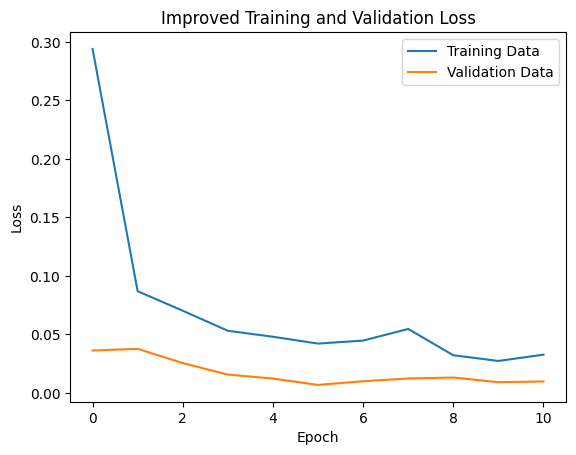

In [109]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Improved Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Data', 'Validation Data'])
plt.show()

- Accuracy

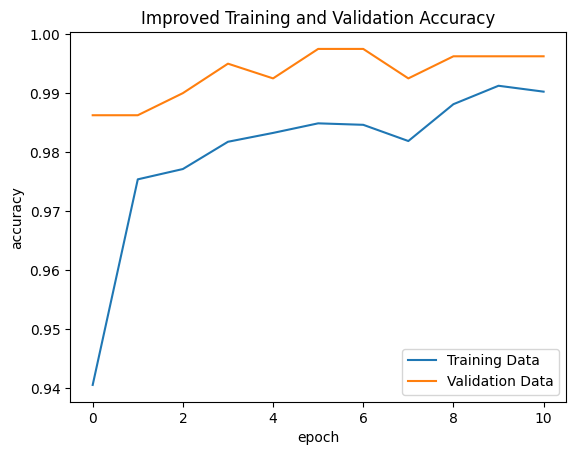

In [110]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Improved Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['Training Data', 'Validation Data'], loc = 'lower right')

#### Analysis Improved Model

Based on the loss and accuracy values of the model, some conclusions that we can draw are:

1. The model uses a small amount of epochs, which indicates that the training time and convergence speed of this model are better than the default model.

2. The difference in loss and accuracy between the training and validation sets is not much different, which indicates that the model is not overfitting and has good generalization performance.

3. The model has no exploding gradients or vanishing gradients, so the model is stable enough to be used in predicting new images.

However, it is also worth noting that the loss value in our validation is lower and the accuracy value in our validation is higher than the training set. This is not uncommon and can happen for various reasons such as:

1. Data Shuffling: During the training process, the data is shuffled before each epoch, which means that the training set and validation set can have slightly different distributions. This can lead to slightly different performance on both sets.

2. Regularization: Regularization techniques such as dropout and weight decay are usually only applied during training and not during validation. This may cause the validation performance to be slightly better than the training performance.

3. Metric calculation: The accuracy and loss metrics on the training set are calculated at the beginning of the epoch while the metric calculation on the validation set is done at the end of the epoch, so the performance on the validation set will be better.

However, since the difference between validation and training performance is relatively small, this is not a cause for concern (e.g. loss val = 0.16, loss train = 0.17). But, if the difference is larger, it could be an indication of overfitting. In such cases, it is better to try regularization techniques or collect more data to improve the generalization performance of the model.

## Model Evaluation

The next step is to evaluate our trained model using the test set.

#### Evaluation on The Test Set

In [111]:
loss, accuracy = model.evaluate(test_gen)

8/8 [==============================] - 5s 638ms/step - loss: 0.0055 - accuracy: 0.9980


Based on the evaluation above, the model succeeds in getting an accuracy that is close to 1 and a loss that is close to 0, this shows that the model is almost perfect in the classification of our model.

Next, we will perform prediction on the test set and show the classification report and confusion matrix on the test set.

In [128]:
y_pred = model.predict(test_gen)

Since the Neural Network model does not predict classes directly but instead generates probabilities for each class, we need to use the following code to predict the class that predicted image belongs to.

In [129]:
y_pred_seq = []
for element in y_pred:
    if element > 0.5:
        y_pred_seq.append(1)
    else:
        y_pred_seq.append(0)

In [130]:
y_pred_seq[:5]

[0, 1, 1, 1, 1]

In [131]:
mapping = {'WithMask':0, 'WithoutMask':1}

In [132]:
test_df['Labels'] = test_df['Labels'].map(mapping)

After that, we will create a classification report and confusion matrix on the prediction set with the test set.

In this case, we will focus on the accuracy metric. Our model is a multi-class classification model where our model must successfully identify each face mask in our class. Since our model has no data imbalance, we can use the accuracy metric to focus on model evaluation. Accuracy is a good metric for overall model performance because it gives equal weight to all classes and gives an indication of how well the model can correctly classify each image in all classes.

In [ ]:
print(classification_report(test_df.Labels, y_pred_seq))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       483
           1       0.98      1.00      0.99       509

    accuracy                           0.99       992
   macro avg       0.99      0.99      0.99       992
weighted avg       0.99      0.99      0.99       992



In [ ]:
matrix = confusion_matrix(test_df.Labels, y_pred_seq)

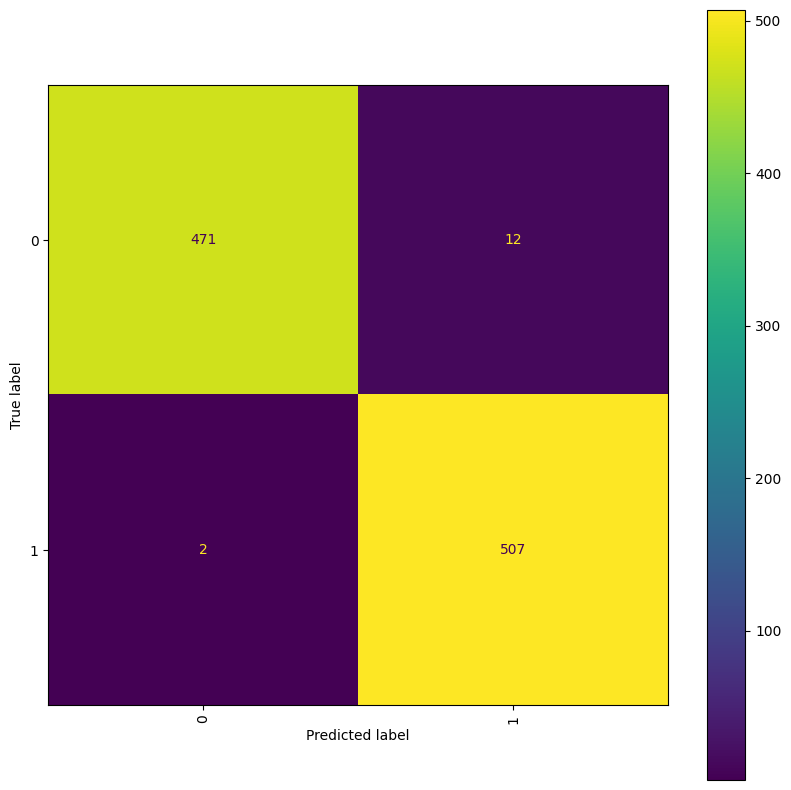

In [ ]:
# create the confusion matrix display with display_labels and plot
cmd = ConfusionMatrixDisplay(confusion_matrix=matrix)
fig, ax = plt.subplots(figsize=(10, 10))
cmd.plot(ax=ax)

# rotate the x-axis tick labels
ax.tick_params(axis='x', labelrotation=90)

plt.show()

Based on the classification report and confusion matrix above, the overall performance of our model seems to be very good, with almost perfect accuracy on a dataset of 992 samples. Precision and recall for each class are also high, with most classes achieving perfect scores. Macro average and weighted average also show a high level of accuracy across all classes.

If we take a closer look at the confusion matrix, we can see that the most misclassified class between the two are the class with face masks. There could be a potential reasoning on why this is the case, but to help explain our case, we will also examine all the misclassified images later.

In addition, we see that the performance on the training set, evaluation set and testing set of our model has similar accuracy and loss, so we can conclude that the model is not overfitting or underfitting.

Although our overall model accuracy is very high, it is important to take a closer look at the misclassified samples to see if there are any common patterns or issues that can be addressed to improve the model performance. We will do this in the next section.

#### Analysis on Misclassified Data

Kita akan menunjukkan gambar pada kelas yang terjadi misklasifikasi berdasarkan confusion matrix diatas menggunakan kode dibawah.

In [ ]:
misclassified_indices = np.where(y_pred_seq != test_df.Labels)

In [ ]:
misclassified_indices[0]

array([ 85, 101, 254, 275, 313, 394, 583, 599, 770, 793, 872, 942, 981,
       991], dtype=int64)

In [ ]:
plt.imread(test_df.Images[1])

array([[[0.18039216, 0.10980392, 0.10196079],
        [0.1882353 , 0.11764706, 0.11764706],
        [0.19607843, 0.1254902 , 0.1254902 ],
        ...,
        [0.30588236, 0.23529412, 0.18039216],
        [0.46666667, 0.39607844, 0.34117648],
        [0.49019608, 0.41960785, 0.3647059 ]],

       [[0.1764706 , 0.10588235, 0.09803922],
        [0.18039216, 0.10980392, 0.10980392],
        [0.1882353 , 0.11764706, 0.11764706],
        ...,
        [0.24313726, 0.17254902, 0.11764706],
        [0.43529412, 0.3647059 , 0.30980393],
        [0.5019608 , 0.43137255, 0.3764706 ]],

       [[0.1764706 , 0.10588235, 0.09803922],
        [0.1764706 , 0.10588235, 0.10588235],
        [0.18039216, 0.10980392, 0.10980392],
        ...,
        [0.28627452, 0.21176471, 0.15686275],
        [0.38431373, 0.30980393, 0.25490198],
        [0.4627451 , 0.3882353 , 0.33333334]],

       ...,

       [[0.23529412, 0.16078432, 0.10588235],
        [0.22745098, 0.15686275, 0.10980392],
        [0.22352941, 0

In [ ]:
df_testing = test_df.reset_index(drop=True)

In [ ]:
print(test_df.Images.head())

0    C:\Users\Administrator\Documents\FM Det\Face M...
1    C:\Users\Administrator\Documents\FM Det\Face M...
2    C:\Users\Administrator\Documents\FM Det\Face M...
3    C:\Users\Administrator\Documents\FM Det\Face M...
4    C:\Users\Administrator\Documents\FM Det\Face M...
Name: Images, dtype: object


In [ ]:
plt.imread(test_df.Images[9])

array([[[0.10196079, 0.12941177, 0.16862746],
        [0.10196079, 0.12941177, 0.16078432],
        [0.10196079, 0.12941177, 0.16078432],
        ...,
        [0.09803922, 0.1254902 , 0.14901961],
        [0.09803922, 0.1254902 , 0.14901961],
        [0.09803922, 0.1254902 , 0.14901961]],

       [[0.10196079, 0.12941177, 0.16862746],
        [0.10196079, 0.12941177, 0.16078432],
        [0.10196079, 0.12941177, 0.16078432],
        ...,
        [0.09803922, 0.1254902 , 0.14901961],
        [0.09803922, 0.1254902 , 0.14901961],
        [0.09803922, 0.1254902 , 0.14901961]],

       [[0.10196079, 0.12941177, 0.16862746],
        [0.10196079, 0.12941177, 0.16078432],
        [0.10196079, 0.12941177, 0.16078432],
        ...,
        [0.09803922, 0.1254902 , 0.14901961],
        [0.09803922, 0.1254902 , 0.14901961],
        [0.09803922, 0.1254902 , 0.14901961]],

       ...,

       [[0.20784314, 0.47058824, 0.6784314 ],
        [0.41568628, 0.6784314 , 0.88235295],
        [0.59607846, 0

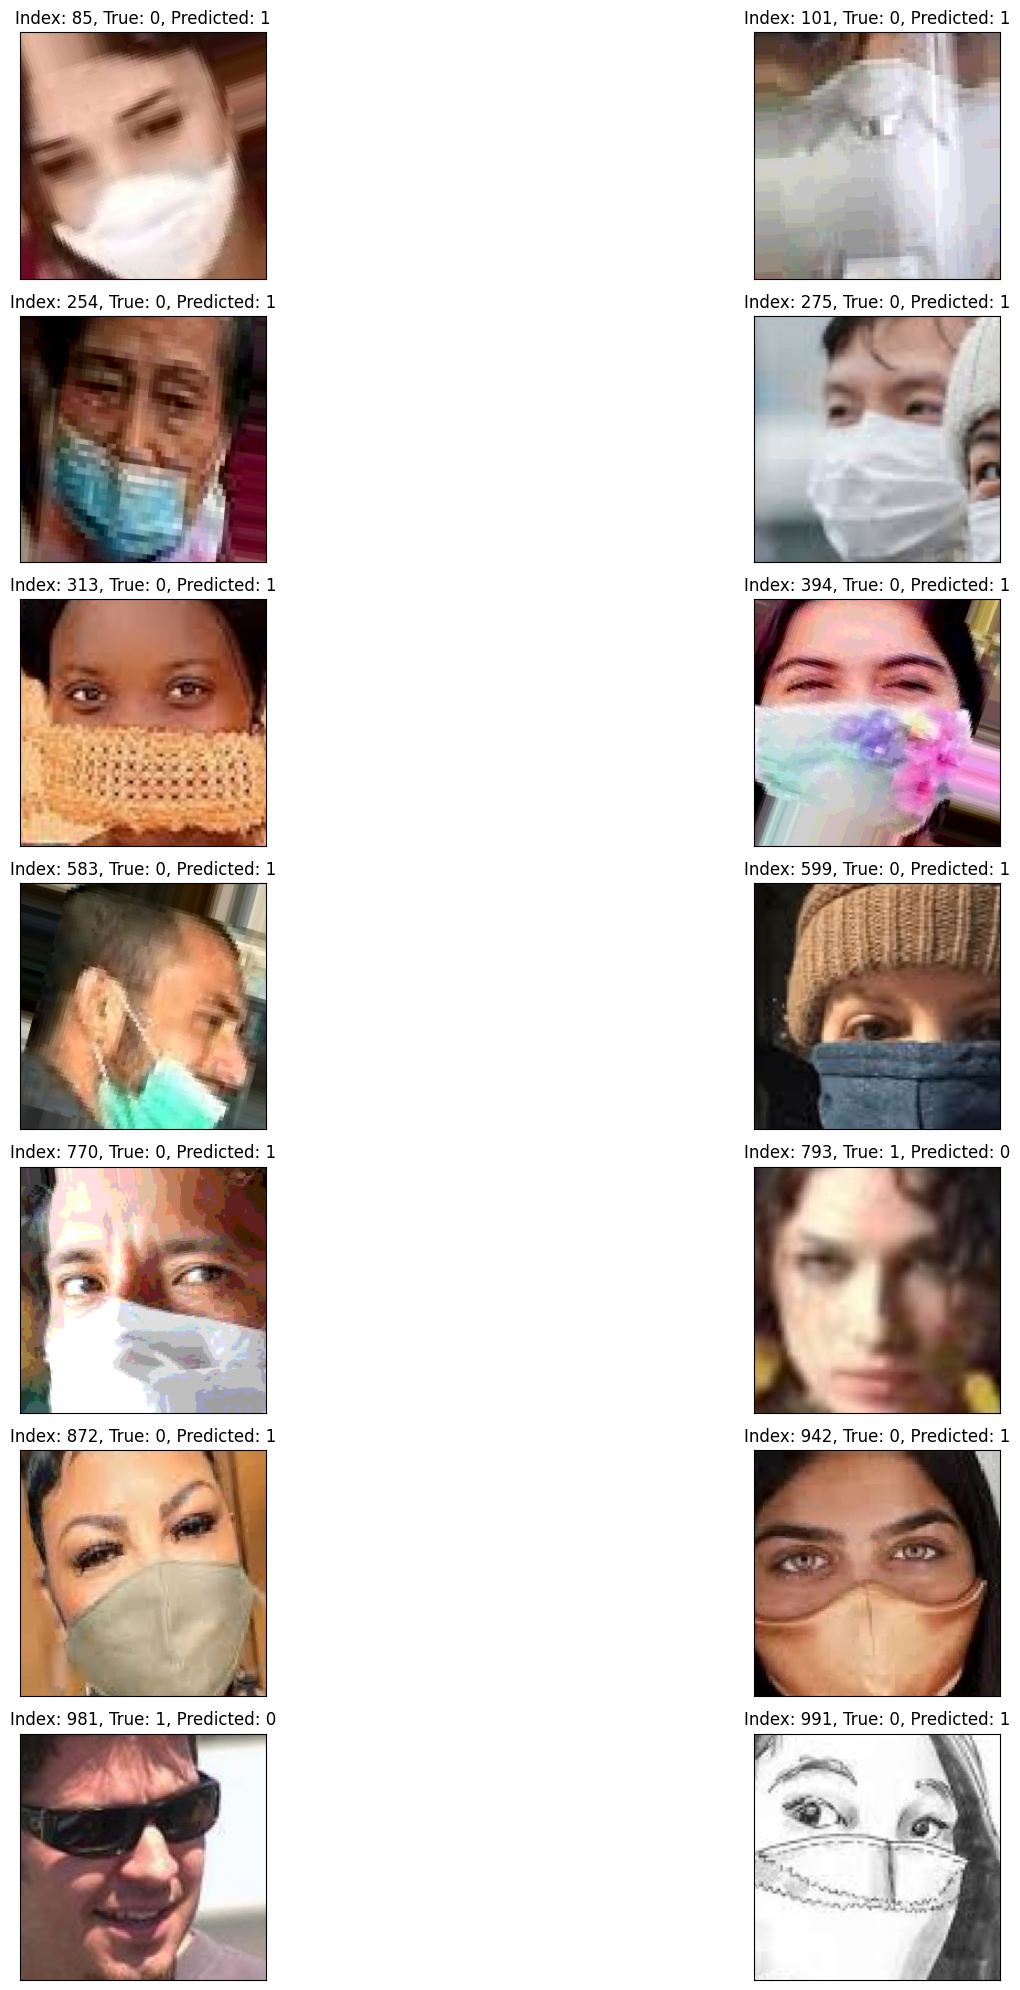

In [ ]:
f, a = plt.subplots(nrows=7, ncols=2, figsize=(20, 20),
                    subplot_kw={'xticks': [], 'yticks': []})

for i, ax in zip(misclassified_indices[0], a.flat):
    ax.imshow(plt.imread(test_df.Images[i]))
    ax.set_title(f"Index: {i}, True: {test_df.Labels[i]}, Predicted: {y_pred_seq[i]}")
    
plt.tight_layout()
plt.show()


Based on the figure above, we see that with mask class has a tendency to be misclassified more than the without mask class, some of the reasons why this can happen include:

- Low image resolution: Some of the images that are misclassified has a low resolution which might not provide enough detail for the model to accurately distinguish between faces with and without masks. For example, in low-resolution images, the mask's edges might blur with the face's contours, making it difficult for the model to detect the mask.

- Poor lighting and contrast: Some of the images that are misclassified are taken in poor lighting conditions or with low contrast between the mask and the face can make it challenging for the model to identify the presence of a mask. The lack of clear boundaries between the mask and the face might cause the model to misclassify mask-wearing faces as maskless.

- Image compression artifacts: Compression artifacts, such as noise and blockiness, can degrade the image quality and obscure the presence of a mask on a person's face. The model might struggle to differentiate between the mask and the artifacts, leading to misclassification.

#### Methods for Improving Model Performance

From all the analysis that has been done, we can conclude that the model is very good at predicting the images in the test set, but some improvement can still be done. Some improvements that can be made to the model to generalize and predict a wider range of fish photos are:

- Use higher-resolution images for training and evaluation, ensuring that they contain sufficient detail for the model to recognize masks accurately.
- Collect or curate images taken in various lighting conditions and with different contrast levels to help the model generalize better across diverse scenarios.
- Make sure the dataset contains a wide range of mask appearances, including different materials, colors, and patterns, to help the model recognize masks in various forms.
- Augment the dataset with images containing occlusions or obstructions to improve the model's robustness to such challenges.

## Model Saving

In [134]:
model.save('model.h5')

c:\Users\Administrator\miniconda3\envs\tf_gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


## Model Inference

Inference will be done in the inference notebook

## Kesimpulan

Kesimpulan yang dapat ditarik dari seluruh case study ini adalah:
- Our model managed to achieve an accuracy of 99% on the test set.

- The model has a tendency to misclassify images (mainly images with masks) that has low resolution, unusual lighting and image artifacts.

- We can improve the model by increasing the quality of the images of our dataset, augmenting the dataset or by using other model architectures.